<a href="https://colab.research.google.com/github/suvinmajithia/Term-Deposit-Marketing-/blob/main/Apziva_Project_2_Term_Deposit_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score
from sklearn.compose import ColumnTransformer
from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
pip install imbalanced class

ERROR: Could not find a version that satisfies the requirement imbalanced (from versions: none)
ERROR: No matching distribution found for imbalanced


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
%cd /content/drive/MyDrive/Colab Notebooks/

/content/drive/MyDrive/Colab Notebooks


In [5]:
!ls

'Apziva Project 2 - Term Deposit Marketing.ipynb'   term-deposit-marketing-2020.csv


In [6]:
#Reading the csv file data into the notebook
import pandas as pd
df = pd.read_csv('term-deposit-marketing-2020.csv')

In [7]:
#Dataset stats and description
df.shape

(40000, 14)

In [8]:
df.describe()

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [10]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
y            object
dtype: object

In [11]:
#Checking for null values
df.isnull().sum()
#No null values in the dataset

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

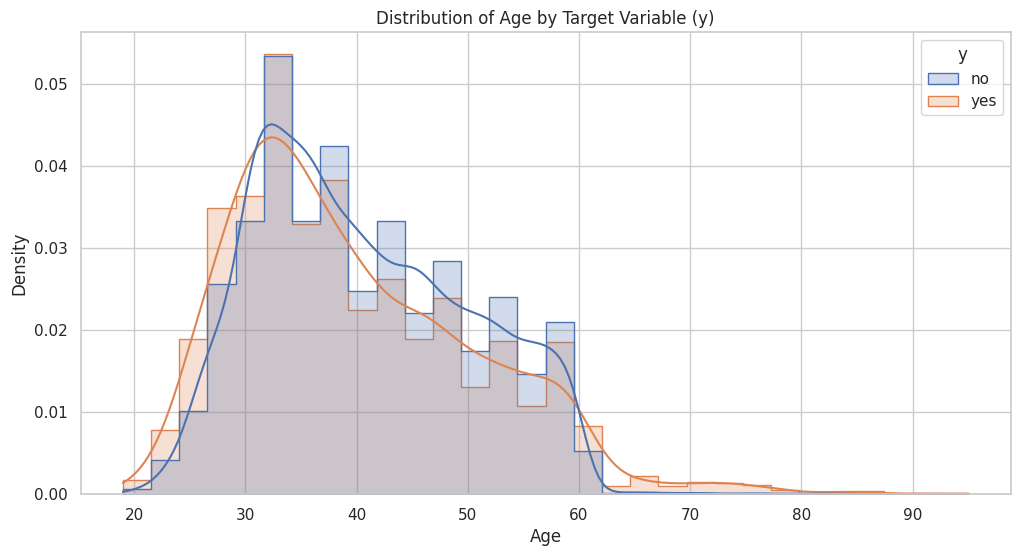

In [12]:
#Performing EDA using seaborn.histplot for age vs target variable y
sns.set(style="whitegrid")

# Plot the distribution of 'age' for each class of the target variable 'y'
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='age', hue='y', bins=30, kde=True, element="step", stat="density", common_norm=False)

# Set plot labels and title
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Distribution of Age by Target Variable (y)')

# Display the plot
plt.show()

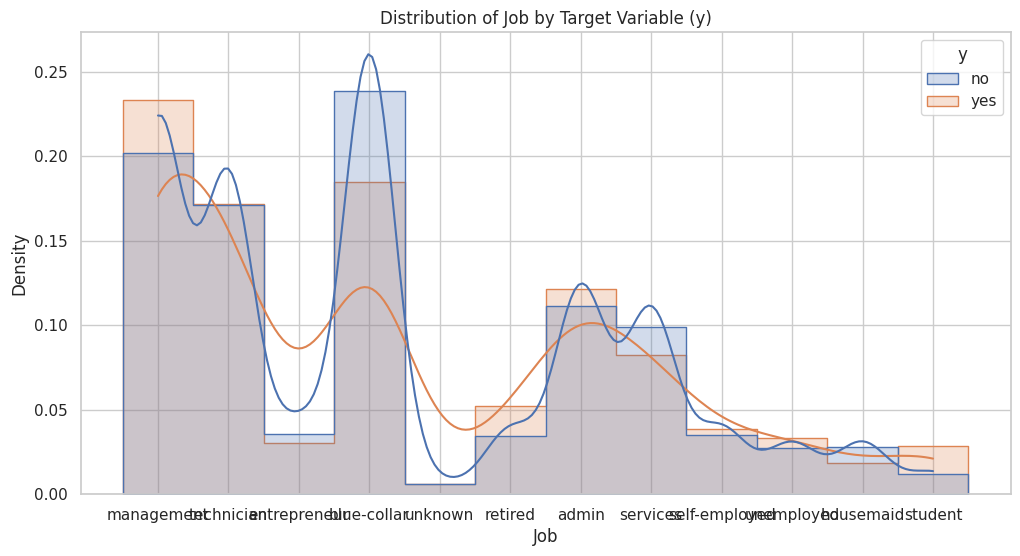

In [13]:
#Performing EDA using seaborn.histplot for job vs target variable y
sns.set(style="whitegrid")

# Plot the distribution of 'job' for each class of the target variable 'y'
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='job', hue='y', bins=30, kde=True, element="step", stat="density", common_norm=False)

# Set plot labels and title
plt.xlabel('Job')
plt.ylabel('Density')
plt.title('Distribution of Job by Target Variable (y)')

# Display the plot
plt.show()

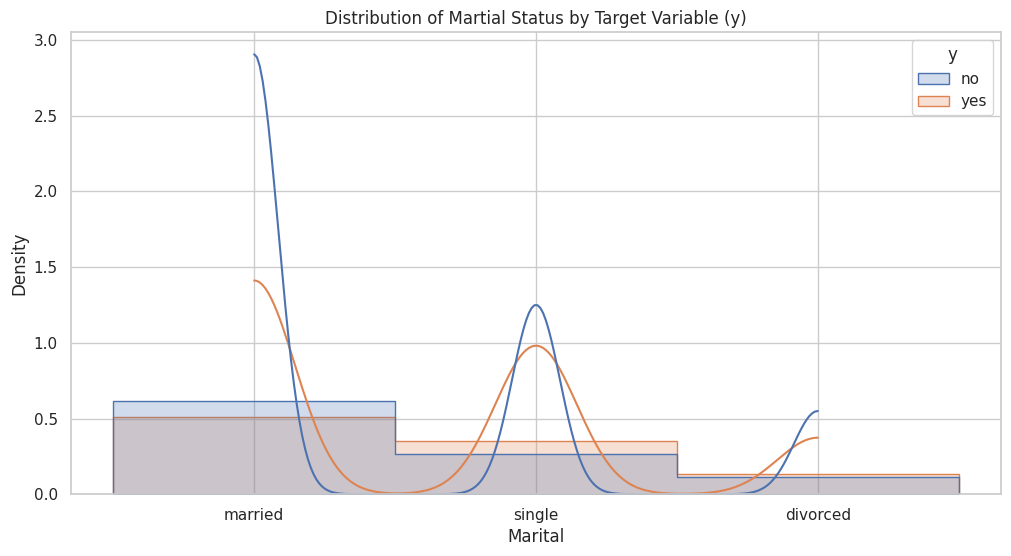

In [14]:
#Performing EDA using seaborn.histplot for marital vs target variable y
sns.set(style="whitegrid")

# Plot the distribution of 'marital' for each class of the target variable 'y'
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='marital', hue='y', bins=30, kde=True, element="step", stat="density", common_norm=False)

# Set plot labels and title
plt.xlabel('Marital')
plt.ylabel('Density')
plt.title('Distribution of Martial Status by Target Variable (y)')

# Display the plot
plt.show()

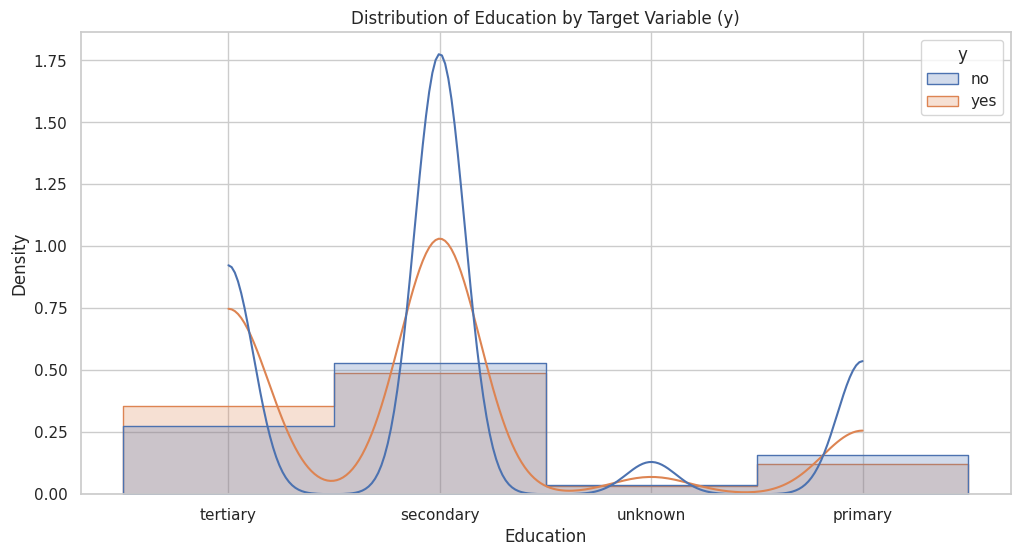

In [15]:
#Performing EDA using seaborn.histplot for education vs target variable y
sns.set(style="whitegrid")

# Plot the distribution of 'education' for each class of the target variable 'y'
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='education', hue='y', bins=30, kde=True, element="step", stat="density", common_norm=False)

# Set plot labels and title
plt.xlabel('Education')
plt.ylabel('Density')
plt.title('Distribution of Education by Target Variable (y)')

# Display the plot
plt.show()

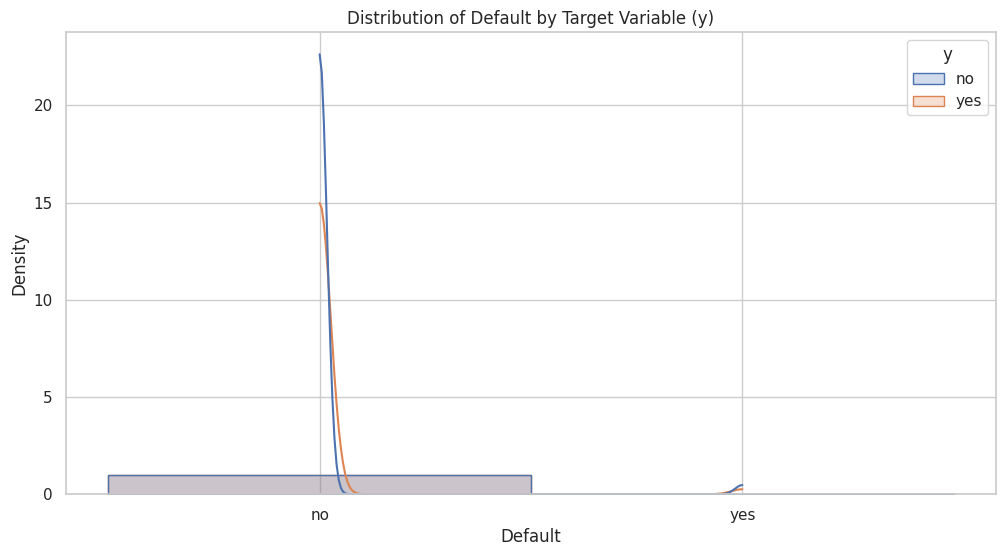

In [16]:
#Performing EDA using seaborn.histplot for default vs target variable y
sns.set(style="whitegrid")

# Plot the distribution of 'default' for each class of the target variable 'y'
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='default', hue='y', bins=30, kde=True, element="step", stat="density", common_norm=False)

# Set plot labels and title
plt.xlabel('Default')
plt.ylabel('Density')
plt.title('Distribution of Default by Target Variable (y)')

# Display the plot
plt.show()

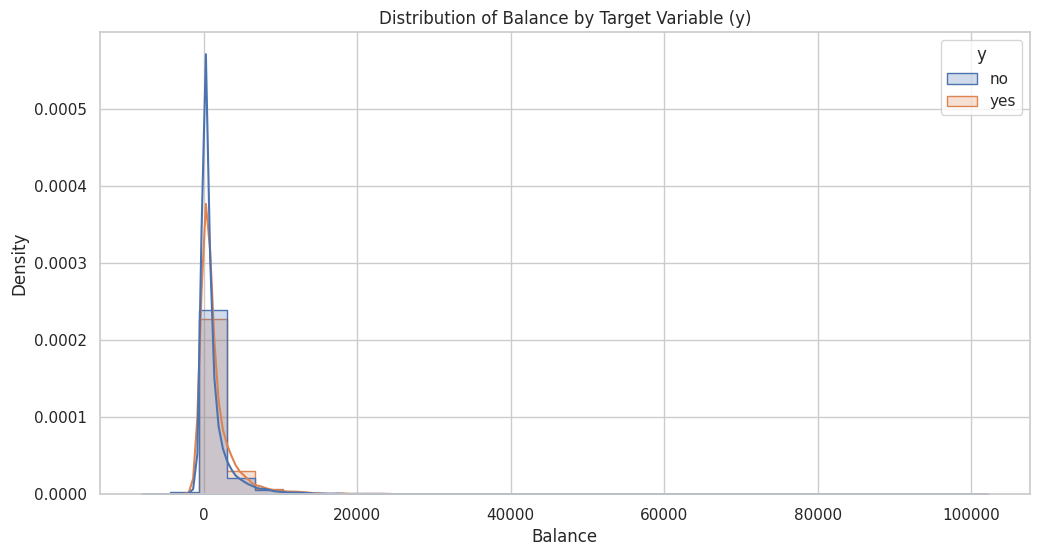

In [17]:
#Performing EDA using seaborn.histplot for balance vs target variable y
sns.set(style="whitegrid")

# Plot the distribution of 'balance' for each class of the target variable 'y'
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='balance', hue='y', bins=30, kde=True, element="step", stat="density", common_norm=False)

# Set plot labels and title
plt.xlabel('Balance')
plt.ylabel('Density')
plt.title('Distribution of Balance by Target Variable (y)')

# Display the plot
plt.show()

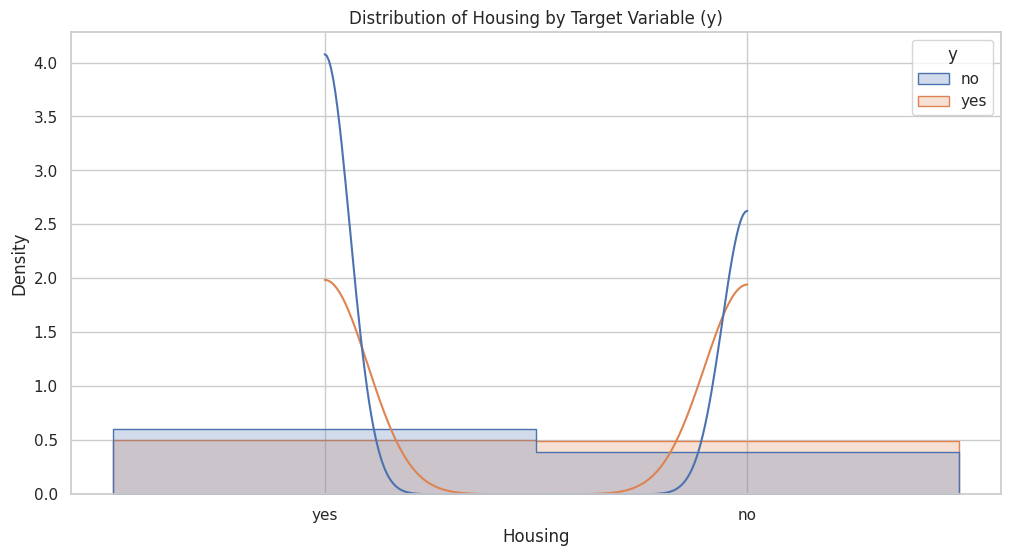

In [18]:
#Performing EDA using seaborn.histplot for housing vs target variable y
sns.set(style="whitegrid")

# Plot the distribution of 'housing' for each class of the target variable 'y'
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='housing', hue='y', bins=30, kde=True, element="step", stat="density", common_norm=False)

# Set plot labels and title
plt.xlabel('Housing')
plt.ylabel('Density')
plt.title('Distribution of Housing by Target Variable (y)')

# Display the plot
plt.show()

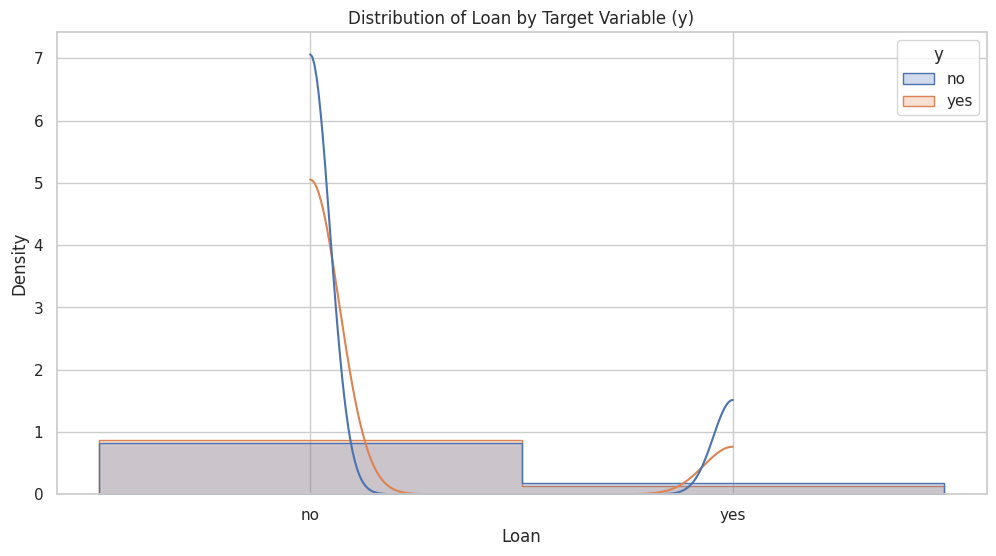

In [19]:
#Performing EDA using seaborn.histplot for loan vs target variable y
sns.set(style="whitegrid")

# Plot the distribution of 'loan' for each class of the target variable 'y'
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='loan', hue='y', bins=30, kde=True, element="step", stat="density", common_norm=False)

# Set plot labels and title
plt.xlabel('Loan')
plt.ylabel('Density')
plt.title('Distribution of Loan by Target Variable (y)')

# Display the plot
plt.show()

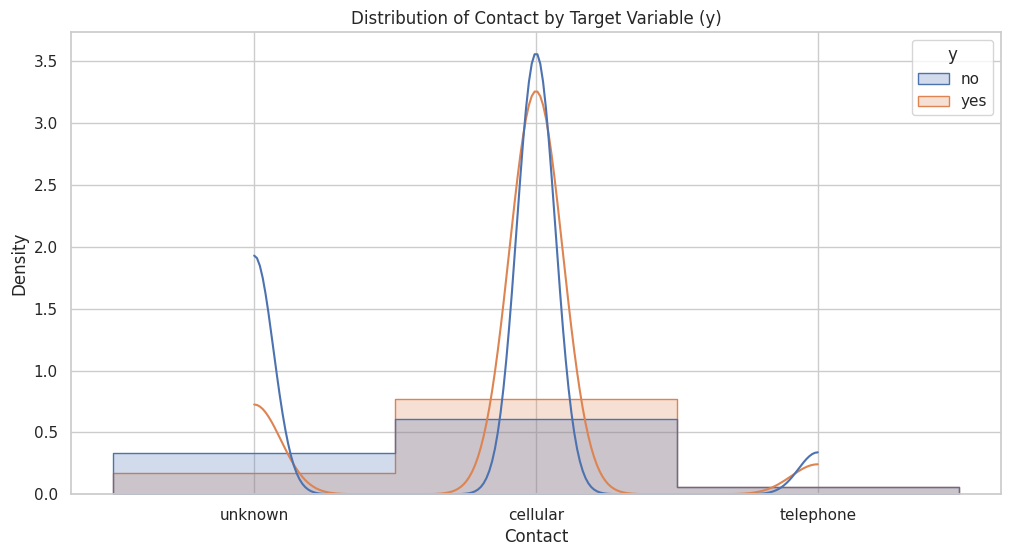

In [20]:
#Performing EDA using seaborn.histplot for contact vs target variable y
sns.set(style="whitegrid")

# Plot the distribution of 'contact' for each class of the target variable 'y'
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='contact', hue='y', bins=30, kde=True, element="step", stat="density", common_norm=False)

# Set plot labels and title
plt.xlabel('Contact')
plt.ylabel('Density')
plt.title('Distribution of Contact by Target Variable (y)')

# Display the plot
plt.show()

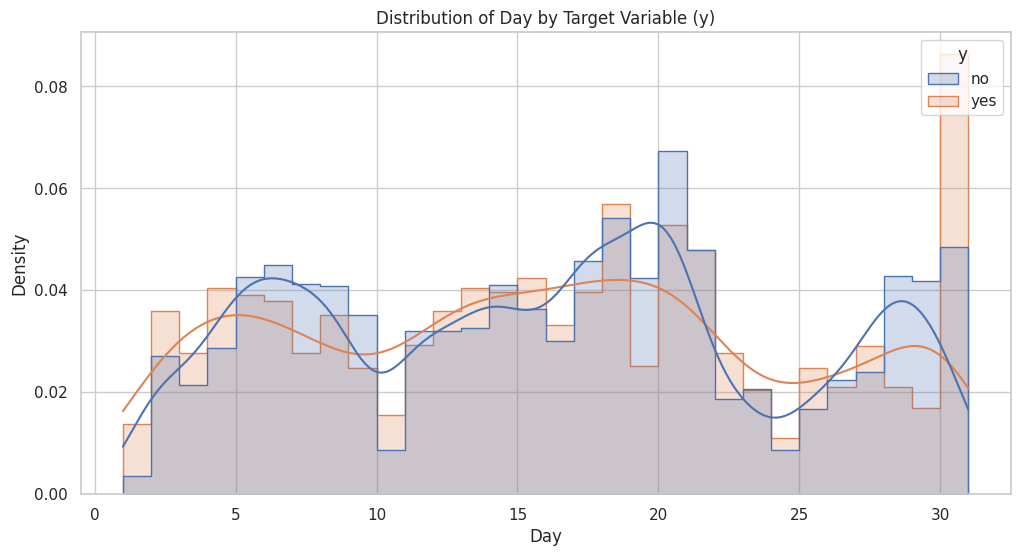

In [21]:
#Performing EDA using seaborn.histplot for day vs target variable y
sns.set(style="whitegrid")

# Plot the distribution of 'day' for each class of the target variable 'y'
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='day', hue='y', bins=30, kde=True, element="step", stat="density", common_norm=False)

# Set plot labels and title
plt.xlabel('Day')
plt.ylabel('Density')
plt.title('Distribution of Day by Target Variable (y)')

# Display the plot
plt.show()

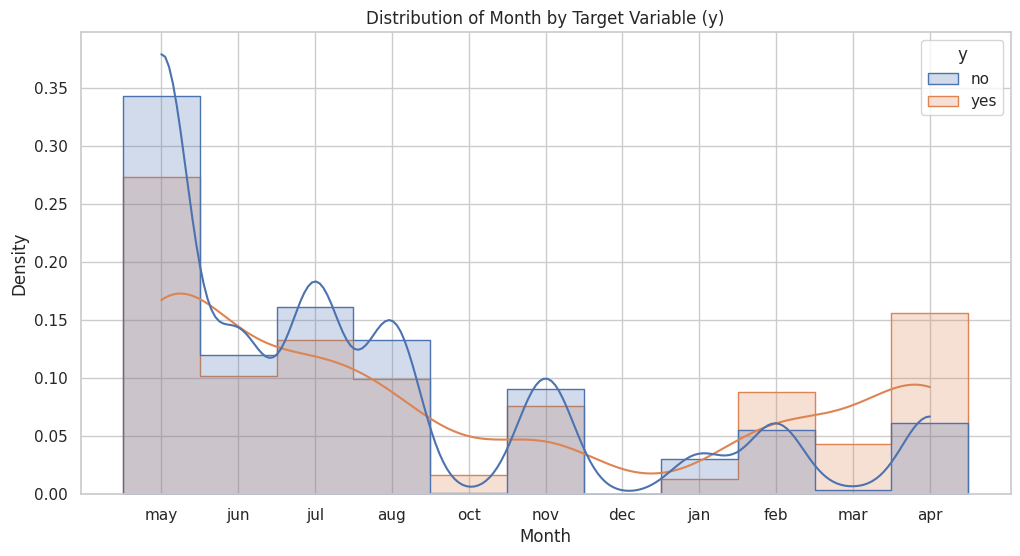

In [22]:
#Performing EDA using seaborn.histplot for month vs target variable y
sns.set(style="whitegrid")

# Plot the distribution of 'month' for each class of the target variable 'y'
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='month', hue='y', bins=30, kde=True, element="step", stat="density", common_norm=False)

# Set plot labels and title
plt.xlabel('Month')
plt.ylabel('Density')
plt.title('Distribution of Month by Target Variable (y)')

# Display the plot
plt.show()

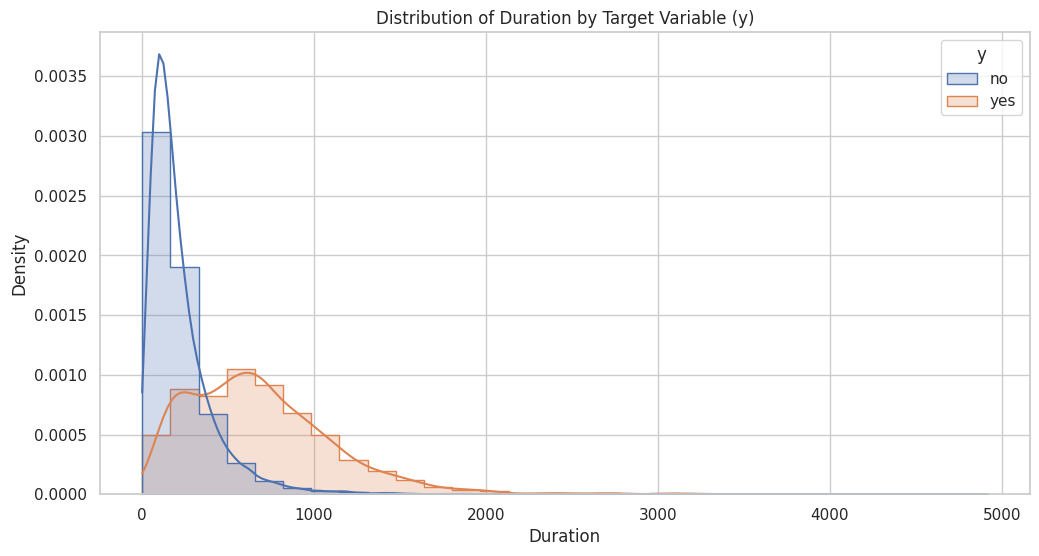

In [23]:
#Performing EDA using seaborn.histplot for duration vs target variable y
sns.set(style="whitegrid")

# Plot the distribution of 'duration' for each class of the target variable 'y'
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='duration', hue='y', bins=30, kde=True, element="step", stat="density", common_norm=False)

# Set plot labels and title
plt.xlabel('Duration')
plt.ylabel('Density')
plt.title('Distribution of Duration by Target Variable (y)')

# Display the plot
plt.show()

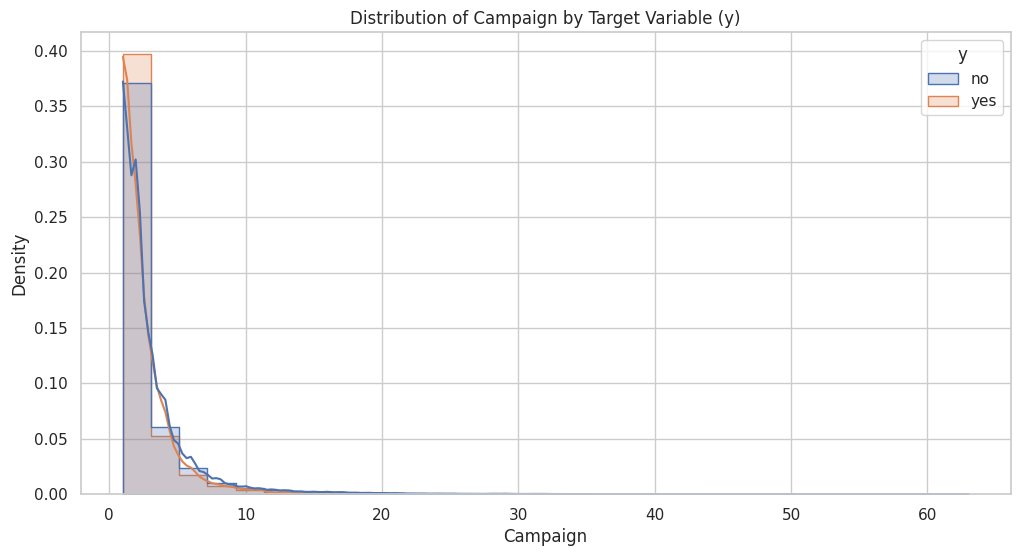

In [24]:
#Performing EDA using seaborn.histplot for campaign vs target variable y
sns.set(style="whitegrid")

# Plot the distribution of 'campaign' for each class of the target variable 'y'
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='campaign', hue='y', bins=30, kde=True, element="step", stat="density", common_norm=False)

# Set plot labels and title
plt.xlabel('Campaign')
plt.ylabel('Density')
plt.title('Distribution of Campaign by Target Variable (y)')

# Display the plot
plt.show()

In [25]:
# Applying one-hot encoding to convert categorical attributes to numerical attributes
categorical_variables = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month']

# Extract the categorical columns from the dataframe
df_categorical = df[categorical_variables]

# Initialize the OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)

# Fit and transform the categorical columns
df_encoded = pd.DataFrame(encoder.fit_transform(df_categorical), columns=encoder.get_feature_names_out(categorical_variables))

# Concatenate the one-hot encoded columns with the original dataframe
target_variable = 'y'
y_column = df[[target_variable]]

# Concatenate df_encoded with the 'y' column
df_final = pd.concat([df_encoded, y_column], axis=1)

# Display the first few rows of the final DataFrame
print(df_final.head())

# Define updated column names for the one-hot encoded variables
categorical_variables_updated = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month']

# Extract the one-hot encoded columns from the dataframe
df_categorical_updated = df[categorical_variables_updated]

# Get unique column names
unique_columns = pd.Index(['_'.join((col, str(i))) for i, col in enumerate(df.columns)])

# Update the columns of the DataFrame
df.columns = unique_columns

# Check for duplicate column names after updating
print(df.columns.duplicated().any())
print(df.columns)
df.shape
df.head()

   job_blue-collar  job_entrepreneur  job_housemaid  job_management  \
0              0.0               0.0            0.0             1.0   
1              0.0               0.0            0.0             0.0   
2              0.0               1.0            0.0             0.0   
3              1.0               0.0            0.0             0.0   
4              0.0               0.0            0.0             0.0   

   job_retired  job_self-employed  job_services  job_student  job_technician  \
0          0.0                0.0           0.0          0.0             0.0   
1          0.0                0.0           0.0          0.0             1.0   
2          0.0                0.0           0.0          0.0             0.0   
3          0.0                0.0           0.0          0.0             0.0   
4          0.0                0.0           0.0          0.0             0.0   

   job_unemployed  ...  month_dec  month_feb  month_jan  month_jul  month_jun  \
0          

,age_0,job_1,marital_2,education_3,default_4,balance_5,housing_6,loan_7,contact_8,day_9,month_10,duration_11,campaign_12,y_13
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [26]:
# Checking for a binary classification problem after one hot encoding
unique_classes = df_final['y'].unique()

if len(unique_classes) == 2:
    print("It's a binary classification problem.")
else:
    print("It's not a binary classification problem.")

It's a binary classification problem.


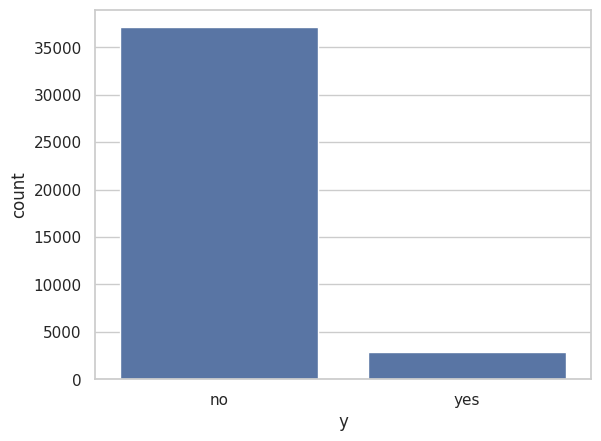

count     40000
unique        2
top          no
freq      37104
Name: y, dtype: object


In [27]:
sns.countplot(x='y', data=df_final)
plt.show()

# Summary statistics
print(df_final['y'].describe())
# The results show that it is a case of imbalanced class: here the value of 'no' is way higher than 'yes', for checking the imbalnce in the
# class, you just need to check the target variable, like here it shows there is a very high imbalance in the values of 'yes' and 'no'.
# Here, it shows heavy imbalance. Do over sampling here to balance yes and no.

In [28]:
# Assuming df is your DataFrame with the target variable 'y' and one-hot encoded features
X = df_final.drop('y', axis=1)
y = df_final['y']

# Create a resampling pipeline with random oversampling of the minority class
# First resample to balance the dataset and then split the dataset
over_sampler = RandomOverSampler(sampling_strategy= 0.5)  # You can adjust the sampling strategy, 0.5 here shows 50-50 split, also can use 'minority' in the arg. Important for interviews.
under_sampler = RandomUnderSampler(sampling_strategy=0.8)  # You can adjust the sampling strategy.

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)# what is random_state, how to define it?
X_resampled, y_resampled = over_sampler.fit_resample(X_train, y_train)

# Assuming train_df and test_df are your original dataframes (before resampling)
# Initialize the OneHotEncoder after oversampling
encoder = OneHotEncoder(drop='first', sparse=False)

# Fit and transform the training data
train_encoded = encoder.fit_transform(X_resampled)
test_encoded = encoder.transform(X_test)# always do oversampling on train data not y.
#resample also in train_df, what does it mean: to avoid data leak.

In [29]:
print("Shape of train_encoded:", train_encoded.shape)# train_encoded is a np array, resampled final train data.
print("Shape of test_encoded:", test_encoded.shape)
print("Shape of X_train:", X_train.shape)# will go in the model
print("Shape of y_train:", y_train.shape)# will go in the model

X_resampled.shape
#y_resampled.shape

Shape of train_encoded: (44520, 31)
Shape of test_encoded: (8000, 31)
Shape of X_train: (32000, 31)
Shape of y_train: (32000,)


(44520, 31)

In [30]:
# now to apply f1 score or do hyperparameter tuning? # do hyperparameter tuning to check f1 score of the data
# Then do predict_proba() to see a threshold where f1 score is good, optimize the score
# now for this project focus solely on f1 score, next steps iterate thru diff values of threshold from 0-9, and do hyperparameter tuning thru 5 fold cross validation, if you know what f1 score actually is.
# use 1. StandardScaler() 2. GridSearchCV for Hyperparameter Tuning 3. Recursive Feature Elimination(for feature selection) 4. SMOTE for improving f1 score.

# Encode labels in y_train and y_test
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_resampled)
y_test_encoded = label_encoder.transform(y_test)

# Model Selection
# Using Logistic regression
lreg = LogisticRegression()

# Perform hyperparameter tuning with GridSearchCV
#param_grid_lr = {
#    'max_iter': [20, 50, 100, 200, 500, 1000],
#    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
#    'class_weight': ['balanced']
#}


param_grid_lr = {
 #   'max_iter': [20, 50, 100, 200, 500, 1000, 2000],  # Expanded range
 #   'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga', 'auto'],  # Added 'auto'
 #   'class_weight': ['balanced', None, {0: 0.1, 1: 0.9}],  # Additional class weight options
 #   'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Regularization options
     'C': [0.001, 0.01, 0.1, 1, 10, 100]  # Inverse of regularization strength
}
# Create a scorer for F1 score
scorer = make_scorer(f1_score, pos_label=label_encoder.transform(['yes'])[0])

# Perform hyperparameter tuning with GridSearchCV
grid_search = GridSearchCV(lreg, param_grid_lr, cv=StratifiedKFold(n_splits=5), scoring=scorer)
grid_search.fit(X_resampled, y_train_encoded)

# Get the best hyperparameter from the grid search
#best_max_iter = grid_search.best_params_['max_iter']
#best_solver = grid_search.best_params_['solver']
#best_class_weight = grid_search.best_params_['class_weight']
best_c = grid_search.best_params_['C']
#best_penalty = grid_search.best_params_['penalty']

# Train the model with the best hyperparameters
lreg = LogisticRegression(C = best_c)
lreg.fit(X_resampled, y_train_encoded)

# Predict probabilities
y_proba_lreg = lreg.predict_proba(X_test)[:, 1]

# Threshold Optimization
best_f1_score = 0
best_threshold = 0

print('Threshold Optimization')
print('--' * 40)

for threshold in range(10):
    threshold /= 10  # convert to decimal

    y_pred_threshold = (y_proba_lreg >= threshold).astype(int)

    # Convert predictions back to original labels
    y_pred_labels = label_encoder.inverse_transform(y_pred_threshold)

    # Calculate F1 score for 'yes'
    f1_threshold_yes = f1_score(y_test, y_pred_labels, pos_label= 'yes')

    # Print F1 score for each threshold
    print(f'Threshold: {threshold:.1f}, F1 Score for "yes": {f1_threshold_yes}')

    # Update best threshold if a better F1 score is found
    if f1_threshold_yes > best_f1_score:
        best_f1_score = f1_threshold_yes
        best_threshold = threshold

# Apply the best threshold for classification
y_pred_lreg_optimized = (y_proba_lreg >= best_threshold).astype(int)

# Convert predictions back to original labels
y_pred_labels = label_encoder.inverse_transform(y_pred_lreg_optimized)

# Print the best threshold and F1 score
print('Best Threshold:', best_threshold)
print("Best F1 Score for 'yes':", best_f1_score)

# Evaluate the model with the optimized threshold
print('Logistic Regression with Optimized Threshold')
print('\n')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_labels)
print('Confusion Matrix')
print(conf_matrix)
print('--' * 40)

# Classification Report
print('Classification Report')
print(classification_report(y_test, y_pred_labels))

# Accuracy
print('--' * 40)
logreg_accuracy = round(accuracy_score(y_test, y_pred_labels) * 100, 2)
print('Accuracy', logreg_accuracy, '%')

# Precision
precision = precision_score(y_test, y_pred_labels, pos_label = 'yes')
print('Precision:', precision)

# Recall
recall = recall_score(y_test, y_pred_labels, pos_label = 'yes')
print('Recall:', recall)

# F1 Score
print('F1 Score:', best_f1_score) # use randomized search, use scoring param in grid search, do not use so many params in the grid search it is stopping the cell execution in the model

Threshold Optimization
--------------------------------------------------------------------------------
Threshold: 0.0, F1 Score for "yes": 0.1343283582089552
Threshold: 0.1, F1 Score for "yes": 0.1342062193126023
Threshold: 0.2, F1 Score for "yes": 0.15483673156523073
Threshold: 0.3, F1 Score for "yes": 0.1875468867216804
Threshold: 0.4, F1 Score for "yes": 0.23370981754995654
Threshold: 0.5, F1 Score for "yes": 0.2662337662337662
Threshold: 0.6, F1 Score for "yes": 0.22680412371134018
Threshold: 0.7, F1 Score for "yes": 0.13455657492354742
Threshold: 0.8, F1 Score for "yes": 0.08931419457735246
Threshold: 0.9, F1 Score for "yes": 0.02707275803722504
Best Threshold: 0.5
Best F1 Score for 'yes': 0.2662337662337662
Logistic Regression with Optimized Threshold


Confusion Matrix
[[6932  492]
 [ 412  164]]
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

          no       0.94    

In [31]:
print(y_test)
print(y_pred_labels)

32823    no
16298    no
28505    no
6689     no
26893    no
         ..
13618    no
35165    no
16359    no
3842     no
37682    no
Name: y, Length: 8000, dtype: object
['yes' 'no' 'no' ... 'no' 'no' 'no']


In [32]:
# Precision
precision = precision_score(y_test, y_pred_labels, pos_label = 'yes')
print('Precision:', precision)

# Recall
recall = recall_score(y_test, y_pred_labels, pos_label = 'yes')
print('Recall', recall)

Precision: 0.25
Recall 0.2847222222222222


In [33]:
# Model Selection
# Using XGBoost
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y_resampled)
y_train_encoded = label_encoder.transform(y_resampled)

# Model Selection
# Using XGBoost
# Create an instance of the model
xgb_model = XGBClassifier()

# Pass training data into the model
xgb_model.fit(X_resampled, y_train_encoded)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Predict probabilities
y_proba_xgb = xgb_model.predict_proba(X_test)

# Ensure y_test has consistent labels
y_test_encoded = label_encoder.transform(y_test)

# Score It
print('XGBoost Classifier')
print('\n')

# Confusion Matrix
print('Confusion Matrix')
print(confusion_matrix(y_test_encoded, y_pred_xgb))
print('--' * 40)

# Classification Report
print('Classification Report')
print(classification_report(y_test_encoded, y_pred_xgb))

# Accuracy
print('--' * 40)
xgb_accuracy = round(accuracy_score(y_test_encoded, y_pred_xgb) * 100, 2)
print('Accuracy', xgb_accuracy, '%')

# Hyperparameter Tuning and Threshold Optimization
# Define the parameter grid for hyperparameter tuning (you can customize this based on your needs)
#param_grid = {'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
#              'n_estimators': [50, 100, 200, 300, 400]}

param_grid = {'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.5],
              'n_estimators': [100, 200, 300, 400, 500]}


# Create a scorer for F1 score
scorer = make_scorer(f1_score, pos_label=label_encoder.transform(['yes'])[0])

# Perform hyperparameter tuning with GridSearchCV
grid_search = GridSearchCV(xgb_model, param_grid, cv=StratifiedKFold(n_splits=5), scoring=scorer)
grid_search.fit(X_resampled, y_train_encoded)

# Get the best hyperparameters from the grid search
best_learning_rate = grid_search.best_params_['learning_rate']
best_n_estimators = grid_search.best_params_['n_estimators']

# Implement 5-fold cross-validation for F1 score
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Iterate through different threshold values from 0 to 1
best_f1_score = 0
best_threshold = 0

for threshold in np.arange(0, 1.1, 0.05):
    # Convert probabilities to binary predictions using the chosen threshold
    y_pred_cv = cross_val_predict(xgb_model, X_resampled, y_train_encoded, cv=cv, method='predict_proba')[:, 1] >= threshold

    # Calculate F1 score for 'yes'
    f1_cv_yes = f1_score(y_train_encoded, y_pred_cv, pos_label=label_encoder.transform(['yes'])[0])

    # Print F1 score for each threshold
    print(f'Threshold: {threshold}, F1 Score for "yes": {f1_cv_yes}')

    # Update best threshold if a better F1 score is found
    if f1_cv_yes > best_f1_score:
        best_f1_score = f1_cv_yes
        best_threshold = threshold

# Apply the best threshold for classification
y_pred_xgb_optimized = (y_proba_xgb[:, 1] >= best_threshold).astype(int)
y_pred_xgb_optimized = label_encoder.inverse_transform(y_pred_xgb_optimized)

# Print the best threshold and F1 score
print('Best Threshold:', best_threshold)
print("Best F1 Score for 'yes':", best_f1_score)

XGBoost Classifier


Confusion Matrix
[[6954  470]
 [ 425  151]]
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7424
           1       0.24      0.26      0.25       576

    accuracy                           0.89      8000
   macro avg       0.59      0.60      0.60      8000
weighted avg       0.89      0.89      0.89      8000

--------------------------------------------------------------------------------
Accuracy 88.81 %
Threshold: 0.0, F1 Score for "yes": 0.5
Threshold: 0.05, F1 Score for "yes": 0.5155348578577883
Threshold: 0.1, F1 Score for "yes": 0.5326529876311709
Threshold: 0.15000000000000002, F1 Score for "yes": 0.5570986151418944
Threshold: 0.2, F1 Score for "yes": 0.5776256193250685
Threshold: 0.25, F1 Score for "yes": 0.5946917931381716
Threshold: 0.30000000000000004, F1 Score for "yes": 0.5974582012302524
Thr

In [ ]:
# Model Selection
# Using Support Vector Machine (SVM)
# Create instance of model
svm_model = SVC()

# Pass training data into the model
svm_model.fit(X_resampled, y_resampled)

# Predict
y_pred_svm = svm_model.predict(X_test)

# Predict probabilities
y_proba_svm = svm_model.decision_function(X_test)

# Ensure y_test has consistent labels
#y_test = np.where(y_test == 1, 'yes', 'no')
#y_pred_svm = np.where(y_pred_svm == 1, 'yes', 'no')

# Score It
print('Support Vector Machine (SVM)')
print('\n')

# Confusion Matrix
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_svm))
print('--' * 40)

# Classification Report
print('Classification Report')
print(classification_report(y_test, y_pred_svm))

# Accuracy
print('--' * 40)
svm_accuracy = round(accuracy_score(y_test, y_pred_svm) * 100, 2)
print('Accuracy', svm_accuracy, '%')

# Hyperparameter Tuning and Threshold Optimization
# Define the parameter grid for hyperparameter tuning
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'kernel': ['linear', 'rbf', 'poly'],
              'gamma': ['scale', 'auto']}

# Create a scorer for F1 score
scorer = make_scorer(f1_score, pos_label=1)

# Perform hyperparameter tuning with GridSearchCV
grid_search = GridSearchCV(svm_model, param_grid, cv=StratifiedKFold(n_splits=5), scoring=scorer)
grid_search.fit(X_resampled, y_resampled)

# Get the best hyperparameters from the grid search
best_C = grid_search.best_params_['C']
best_kernel = grid_search.best_params_['kernel']
best_gamma = grid_search.best_params_['gamma']

# Implement 5-fold cross-validation for F1 score
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Iterate through different threshold values from 0 to 1
best_f1_score = 0
best_threshold = 0

for threshold in np.arange(0, 1.1, 0.05):
    # Convert decision_function values to binary predictions using the chosen threshold
    y_pred_cv = cross_val_predict(svm_model, X_resampled, y_resampled, cv=cv, method='decision_function') >= threshold

    # Convert integer labels to strings
    y_pred_cv_str = np.where(y_pred_cv == 1, 'yes', 'no')

    # Calculate F1 score for 'yes'
    f1_cv_yes = f1_score(y_resampled, y_pred_cv_str, pos_label='yes')

    # Print F1 score for each threshold
    print(f'Threshold: {threshold:.2f}, F1 Score for "yes": {f1_cv_yes}')

    # Update best threshold if a better F1 score is found
    if f1_cv_yes > best_f1_score:
        best_f1_score = f1_cv_yes
        best_threshold = threshold

# Apply the best threshold for classification
y_pred_svm_optimized = (y_proba_svm >= best_threshold).astype(int)

# Print the best threshold and F1 score
print('Best Threshold:', best_threshold)
print("Best F1 Score for 'yes':", best_f1_score)

Support Vector Machine (SVM)


Confusion Matrix
[[7043  381]
 [ 437  139]]
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

          no       0.94      0.95      0.95      7424
         yes       0.27      0.24      0.25       576

    accuracy                           0.90      8000
   macro avg       0.60      0.59      0.60      8000
weighted avg       0.89      0.90      0.90      8000

--------------------------------------------------------------------------------
Accuracy 89.78 %


In [ ]:
# Model Selection
# Using K-Nearest Neighbors (KNN)
# Create instance of model

# change parameters of paramgrid of all models
knn_model = KNeighborsClassifier()

# Pass training data into the model
knn_model.fit(X_resampled, y_resampled)

# Predict
y_pred_knn = knn_model.predict(X_test)

# Score It
print('K-Nearest Neighbors (KNN) Classifier')
print('\n')

# Confusion Matrix
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_knn))
print('--' * 40)

# Classification Report
print('Classification Report')
print(classification_report(y_test, y_pred_knn))

# Accuracy
print('--' * 40)
knn_accuracy = round(accuracy_score(y_test, y_pred_knn) * 100, 2)
print('Accuracy', knn_accuracy, '%')

# Hyperparameter Tuning and Threshold Optimization
# Define the parameter grid for hyperparameter tuning (you can customize this based on your needs)
param_grid = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance']}

# Create a scorer for F1 score
scorer = make_scorer(f1_score, pos_label='yes')

# Perform hyperparameter tuning with GridSearchCV
grid_search = GridSearchCV(knn_model, param_grid, cv=StratifiedKFold(n_splits=5), scoring=scorer)
grid_search.fit(X_resampled, y_resampled)

# Get the best hyperparameters from the grid search
best_n_neighbors = grid_search.best_params_['n_neighbors']
best_weights = grid_search.best_params_['weights']

# Implement 5-fold cross-validation for F1 score
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Iterate through different threshold values from 0 to 9
best_f1_score = 0
best_threshold = 0

for threshold in np.arange(0, 1.1, 0.05):
    # Convert probabilities to binary predictions using the chosen threshold
    y_pred_cv = cross_val_predict(knn_model, X_resampled, y_resampled, cv=cv, method='predict_proba')[:, 1] >= threshold

    # Convert integer labels to strings
    y_pred_cv_str = np.where(y_pred_cv == 1, 'yes', 'no')

    # Calculate F1 score for 'yes'
    f1_cv_yes = f1_score(y_resampled, y_pred_cv_str, pos_label='yes')

    # Print F1 score for each threshold
    print(f'Threshold: {threshold}, F1 Score for "yes": {f1_cv_yes}')

    # Update best threshold if a better F1 score is found
    if f1_cv_yes > best_f1_score:
        best_f1_score = f1_cv_yes
        best_threshold = threshold

# Apply the best threshold for classification
y_pred_knn_optimized = (y_pred_knn == 'yes').astype(int)

# Print the best threshold and F1 score
print('Best Threshold:', best_threshold)
print("Best F1 Score for 'yes':", best_f1_score)

In [ ]:
# Model Selection
# Using Naive Bayes
# Create instance of model
naive_bayes_model = GaussianNB()

# Pass training data into the model
naive_bayes_model.fit(X_resampled, y_resampled)

# Predict
y_pred_naive_bayes = naive_bayes_model.predict(X_test)


# Ensure y_test has consistent labels
y_test = np.where(y_test == 1, 'yes', 'no')
y_pred_naive_bayes = np.where(y_pred_naive_bayes == 1, 'yes', 'no')

# Score It

print(y_pred_naive_bayes)
print('Naive Bayes Classifier')
print('\n')

# Confusion Matrix
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_naive_bayes))
print('--' * 40)

# Classification Report
print('Classification Report')
print(classification_report(y_test, y_pred_naive_bayes))

# Accuracy
print('--' * 40)
naive_bayes_accuracy = round(accuracy_score(y_test, y_pred_naive_bayes) * 100, 2)
print('Accuracy', naive_bayes_accuracy, '%')

# Hyperparameter Tuning and Threshold Optimization
# Define the parameter grid for hyperparameter tuning
#param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create a scorer for F1 score
scorer = make_scorer(f1_score, pos_label='yes')

# Perform hyperparameter tuning with GridSearchCV
grid_search = GridSearchCV(naive_bayes_model, param_grid, cv=StratifiedKFold(n_splits=5), scoring=scorer)
grid_search.fit(X_resampled, y_resampled)

# Get the best hyperparameter from the grid search
#best_C = grid_search.best_params_['C']

# Implement 5-fold cross-validation for F1 score
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Iterate through different threshold values from 0 to 9
best_f1_score = 0
best_threshold = 0

for threshold in np.arange(0, 0.8, 0.05):
    # Convert probabilities to binary predictions using the chosen threshold
    y_pred_cv = cross_val_predict(naive_bayes_model, X_resampled, y_resampled, cv=cv, method='predict_proba')[:, 1] >= threshold

    # Convert integer labels to strings
    y_pred_cv_str = np.where(y_pred_cv == 1, 'yes', 'no')

    # Calculate F1 score for 'yes'
    f1_cv_yes = f1_score(y_train, y_pred_cv_str, pos_label='yes')

    # Print F1 score for each threshold
    print(f'Threshold: {threshold}, F1 Score for "yes": {f1_cv_yes}')

    # Update best threshold if a better F1 score is found
    if f1_cv_yes > best_f1_score:
        best_f1_score = f1_cv_yes
        best_threshold = threshold


# Apply the best threshold for classification (No threshold optimization for Naive Bayes)
y_pred_naive_bayes_optimized = y_pred_naive_bayes

# Print the best threshold and F1 score
print("Best Threshold: ",best_threshold)
print("Best F1 Score for 'yes':", best_f1_score)

In [ ]:
# Model Selection
# Using Random Forest
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y_resampled)
y_train_encoded = label_encoder.transform(y_resampled)

# Create an instance of the Random Forest model
rf_model = RandomForestClassifier()

# Pass training data into the model
rf_model.fit(X_resampled, y_train_encoded)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Predict probabilities
y_proba_rf = rf_model.predict_proba(X_test)

# Ensure y_test has consistent labels
y_test_encoded= label_encoder.transform(y_test)

# Score It
print('Random Forest Classifier')
print('\n')

# Confusion Matrix
print('Confusion Matrix')
print(confusion_matrix(y_test_encoded, y_pred_rf))
print('--' * 40)

# Classification Report
print('Classification Report')
print(classification_report(y_test_encoded, y_pred_rf))

# Accuracy
print('--' * 40)
rf_accuracy = round(accuracy_score(y_test_encoded, y_pred_rf) * 100, 2)
print('Accuracy', rf_accuracy, '%')

# Hyperparameter Tuning and Threshold Optimization
# Define the parameter grid for hyperparameter tuning (you can customize this based on your needs)
param_grid_rf = {'n_estimators': [50, 100, 150]}
                # 'max_depth': [None, 10, 20],
                # 'min_samples_split': [2, 5, 10],
                # 'min_samples_leaf': [1, 2, 4],
                # 'bootstrap': [True, False]}

# Create a scorer for F1 score
scorer_rf = make_scorer(f1_score, pos_label=label_encoder.transform(['yes'])[0])

# Perform hyperparameter tuning with GridSearchCV
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=StratifiedKFold(n_splits=5), scoring=scorer_rf)
grid_search_rf.fit(X_resampled, y_train_encoded)

# Get the best hyperparameters from the grid search
best_n_estimators_rf = grid_search_rf.best_params_['n_estimators']
#best_max_depth_rf = grid_search_rf.best_params_['max_depth']
#best_min_samples_split_rf = grid_search_rf.best_params_['min_samples_split']
#best_min_samples_leaf_rf = grid_search_rf.best_params_['min_samples_leaf']
#best_bootstrap_rf = grid_search_rf.best_params_['bootstrap']

# Implement 5-fold cross-validation for F1 score
cv_rf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Iterate through different threshold values from 0 to 1
best_f1_score_rf = 0
best_threshold_rf = 0

for threshold_rf in np.arange(0, 1.1, 0.05):
    # Convert probabilities to binary predictions using the chosen threshold
    y_pred_cv_rf = cross_val_predict(rf_model, X_resampled, y_train_encoded, cv=cv_rf, method='predict_proba')[:, 1] >= threshold_rf

    # Calculate F1 score for 'yes'
    f1_cv_yes_rf = f1_score(y_train_encoded, y_pred_cv_rf, pos_label=label_encoder.transform(['yes'])[0])

    # Print F1 score for each threshold
    print(f'Threshold: {threshold_rf}, F1 Score for "yes": {f1_cv_yes_rf}')

    # Update best threshold if a better F1 score is found
    if f1_cv_yes_rf > best_f1_score_rf:
        best_f1_score_rf = f1_cv_yes_rf
        best_threshold_rf = threshold_rf

# Apply the best threshold for classification
y_pred_rf_optimized = (y_proba_rf[:, 1] >= best_threshold_rf).astype(int)
y_pred_rf_optimized = label_encoder.inverse_transform(y_pred_rf_optimized)

# Print the best threshold and F1 score
print('Best Threshold:', best_threshold_rf)
print("Best F1 Score for 'yes':", best_f1_score_rf)

In [ ]:
# Identify Important Features
xgb_feature_importances = xgb_model.feature_importances_
sorted_xgb_features = sorted(zip(X.columns, xgb_feature_importances), key=lambda x: x[1], reverse=True)
print("XGBoost Feature Importances:")
for feature, importance in sorted_xgb_features:
    print(f"{feature}: {importance}")

# Bonus - Segmenting Customers using K-Means
from sklearn.cluster import KMeans

# Assuming X contains your feature data
kmeans = KMeans(n_clusters=3)  # Adjust the number of clusters as needed
X['cluster'] = kmeans.fit_predict(X)

# Bonus - Determine Customer Prioritization
cluster_prioritization = X.groupby('cluster')['y'].mean().sort_values(ascending=False)
print("Cluster Prioritization:")
print(cluster_prioritization)

# Bonus - Feature Importance for Purchase Prediction (using XGBoost)
# Extract feature importances
xgb_feature_importances = xgb_model.feature_importances_

# Map feature names to their importance scores
feature_importance_dict = dict(zip(X.columns, xgb_feature_importances))

# Sort features by importance
sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print feature importances
print("Feature Importances:")
for feature, importance in sorted_feature_importances:
    print(f"{feature}: {importance:.4f}")

# Optional: Visualize Feature Importances

sns.barplot(x=[importance for feature, importance in sorted_xgb_features[:10]],
            y=[feature for feature, importance in sorted_xgb_features[:10]])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances (XGBoost)')
plt.show()